# TD Classification

## Exercice 1

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. (a) Implémentation des fonctions d'impureté [cite: 10]

def entropy(probabilities):
    """
    Calcule l'entropie d'une liste de probabilités.
    Formule: -sum(p * log2(p))
    """
    result = 0
    for p in probabilities:
        if p > 0: # On évite log(0)
            result -= p * math.log(p, 2)
    return result

def gini(probabilities):
    """
    Calcule l'indice de Gini.
    Formule: 1 - sum(p^2)
    """
    sq_sum = sum([p**2 for p in probabilities])
    return 1 - sq_sum

def classification_error(probabilities):
    """
    Calcule l'erreur de classification.
    Formule: 1 - max(p)
    """
    return 1 - max(probabilities)

In [4]:
# 1. (b) Tests sur les exemples du livre [cite: 12]
test_probs = [
    [0.0, 1.0],      # Pur
    [1/6, 5/6],      # Mélangé (0.1667, 0.8333)
    [0.5, 0.5]       # Équiprobable
]

print("--- Tests Exercice 1(b) ---")
for p in test_probs:
    print(f"P={p} -> Entropy: {entropy(p):.4f}, Gini: {gini(p):.4f}, Error: {classification_error(p):.4f}")

--- Tests Exercice 1(b) ---
P=[0.0, 1.0] -> Entropy: 0.0000, Gini: 0.0000, Error: 0.0000
P=[0.16666666666666666, 0.8333333333333334] -> Entropy: 0.6500, Gini: 0.2778, Error: 0.1667
P=[0.5, 0.5] -> Entropy: 1.0000, Gini: 0.5000, Error: 0.5000


In [5]:
# 1. (c) Reproduction de la Fig 4.13 (Fig. 1 du TD) 
x = np.linspace(0, 1, 100)
y_entropy = [entropy([p, 1-p]) for p in x]
y_gini = [gini([p, 1-p]) for p in x]
y_error = [classification_error([p, 1-p]) for p in x]

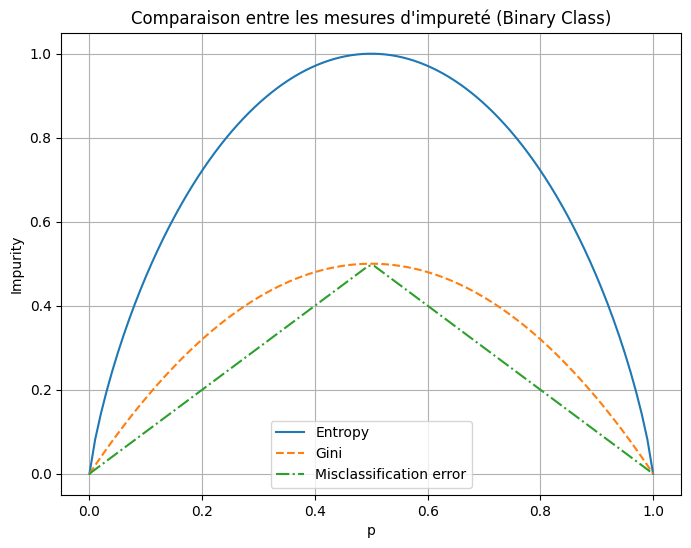

In [6]:
# Mise à l'échelle de l'entropie pour correspondre à la figure du TD (souvent montrée avec un max à 0.5 ou 1.0)
# Dans la figure du TD[cite: 1], l'entropie monte à 1.0.

plt.figure(figsize=(8, 6))
plt.plot(x, y_entropy, label='Entropy')
plt.plot(x, y_gini, label='Gini', linestyle='--')
plt.plot(x, y_error, label='Misclassification error', linestyle='-.')
plt.title("Comparaison entre les mesures d'impureté (Binary Class)")
plt.xlabel("p")
plt.ylabel("Impurity")
plt.legend()
plt.grid(True)
plt.show()

## Exercice 2

In [7]:
from collections import Counter

In [9]:
# 2. (a) Fonction impurity_split [cite: 31]
def get_probs_from_counts(counts):
    total = sum(counts.values())
    return [c/total for c in counts.values()]

def impurity_split(cnt, impurity_function):
    """
    Calcule l'impureté pondérée d'un split.
    cnt: Dictionnaire de la forme {"N1": {"C0":4, "C1":3}, ...}
    impurity_function: entropy, gini, ou classification_error
    """
    total_samples = sum(sum(node_counts.values()) for node_counts in cnt.values())
    weighted_impurity = 0

    for node, counts in cnt.items():
        n_samples_node = sum(counts.values())
        probs = get_probs_from_counts(counts)
        imp = impurity_function(probs)
        
        # Poids = (nombre d'exemples dans ce nœud) / (total exemples)
        weighted_impurity += (n_samples_node / total_samples) * imp
        
    return weighted_impurity

# Test demandé dans le sujet [cite: 32]
test_cnt = {"N1": {"C0":4, "C1":3}, "N2": {"C0":2, "C1":3}}
print(f"Split Impurity (Gini, Test 1): {impurity_split(test_cnt, gini):.3f}") # Attendu ~0.486

# --- Chargement des données Exercice 2 [cite: 35-196] ---
header = ["Customer ID", "Gender", "Car Type", "Shirt Size", "Class"]
data_ex2 = [
    ["1", "M", "Family", "Small", "C0"],
    ["2", "M", "Sports", "Medium", "C0"],
    ["3", "M", "Sports", "Medium", "C0"],
    ["4", "M", "Sports", "Large", "C0"],
    ["5", "M", "Sports", "Extra Large", "C0"],
    ["6", "M", "Sports", "Extra Large", "C0"],
    ["7", "F", "Sports", "Small", "C0"],
    ["8", "F", "Sports", "Small", "C0"],
    ["9", "F", "Sports", "Medium", "C0"],
    ["10", "F", "Luxury", "Large", "C0"],
    ["11", "M", "Family", "Large", "C1"],
    ["12", "M", "Family", "Extra Large", "C1"],
    ["13", "M", "Family", "Medium", "C1"],
    ["14", "M", "Luxury", "Extra Large", "C1"],
    ["15", "F", "Luxury", "Small", "C1"],
    ["16", "F", "Luxury", "Small", "C1"],
    ["17", "F", "Luxury", "Medium", "C1"],
    ["18", "F", "Luxury", "Medium", "C1"],
    ["19", "F", "Luxury", "Medium", "C1"],
    ["20", "F", "Luxury", "Large", "C1"]
]

# Fonction utilitaire pour compter les classes par valeur d'attribut
def get_counts_for_split(dataset, attr_index, target_index):
    split_counts = {}
    for row in dataset:
        val = row[attr_index]
        label = row[target_index]
        
        if val not in split_counts:
            split_counts[val] = Counter()
        split_counts[val][label] += 1
    return split_counts

Split Impurity (Gini, Test 1): 0.486


In [10]:
# 2. (b) Gini du jeu de données complet [cite: 199]
target_counts = Counter([row[4] for row in data_ex2])
total_gini = gini([c/len(data_ex2) for c in target_counts.values()])
print(f"\n2(b) Gini global du dataset: {total_gini:.3f}")


2(b) Gini global du dataset: 0.500


In [11]:
# 2. (c) Gini Customer ID [cite: 200]
# Chaque ID est unique -> nœuds purs -> Gini = 0.0
id_counts = get_counts_for_split(data_ex2, 0, 4)
gini_id = impurity_split(id_counts, gini)
print(f"2(c) Gini Customer ID: {gini_id:.3f}")

2(c) Gini Customer ID: 0.000


In [12]:
# 2. (d) Gini Gender [cite: 201]
gender_counts = get_counts_for_split(data_ex2, 1, 4)
gini_gender = impurity_split(gender_counts, gini)
print(f"2(d) Gini Gender: {gini_gender:.3f}")

2(d) Gini Gender: 0.480


In [13]:
# 2. (e) Gini Car Type (Multiway) [cite: 202]
car_counts = get_counts_for_split(data_ex2, 2, 4)
gini_car = impurity_split(car_counts, gini)
print(f"2(e) Gini Car Type (Multiway): {gini_car:.3f}")

2(e) Gini Car Type (Multiway): 0.163


In [14]:
# 2. (f) Gini Shirt Size (Multiway) [cite: 203]
shirt_counts = get_counts_for_split(data_ex2, 3, 4)
gini_shirt = impurity_split(shirt_counts, gini)
print(f"2(f) Gini Shirt Size: {gini_shirt:.3f}")

2(f) Gini Shirt Size: 0.491


2. (g) Quel attribut est le meilleur : Gender, Car Type ou Shirt Size ?

L'attribut Car Type est le meilleur.
Justification : On choisit l'attribut qui minimise l'impureté pondérée (Indice de Gini le plus faible).
- Gini(Car Type) ≈ 0.163
- Gini(Gender) ≈ 0.480
- Gini(Shirt Size) ≈ 0.491
Car Type offre donc le meilleur gain de pureté.

2. (h) Expliquer pourquoi Customer ID ne doit pas être utilisé...

Bien que Customer ID ait l'indice de Gini le plus bas (0.0, car chaque nœud est pur avec 1 seul exemple), il ne doit pas être utilisé car il s'agit d'un identifiant unique.
Utiliser cet attribut conduit à du sur-apprentissage (overfitting) : l'arbre mémorise les données d'entraînement par cœur (chaque ID mène à une feuille) mais est incapable de généraliser sur de nouvelles données (car les futurs ID seront inconnus).

## Exercice 3

In [15]:
# --- Données Exercice 3 [cite: 207-265] ---
data_ex3 = [
    ["1", "T", "T", 1.0, "+"],
    ["2", "T", "T", 6.0, "+"],
    ["3", "T", "F", 5.0, "-"],
    ["4", "F", "F", 4.0, "+"],
    ["5", "F", "T", 7.0, "-"],
    ["6", "F", "T", 3.0, "-"],
    ["7", "F", "F", 8.0, "-"],
    ["8", "T", "F", 7.0, "+"],
    ["9", "F", "T", 5.0, "-"]
]

def information_gain(parent_entropy, children_counts):
    return parent_entropy - impurity_split(children_counts, entropy)

# 3. (a) Entropie du jeu de données [cite: 266]
target_ex3 = [row[4] for row in data_ex3]
counts_ex3 = Counter(target_ex3)
probs_ex3 = [c/len(data_ex3) for c in counts_ex3.values()]
parent_entropy = entropy(probs_ex3)
print(f"\n--- Exercice 3 ---\n3(a) Entropie globale: {parent_entropy:.3f}")

# 3. (b) Gain pour a1 et a2 [cite: 267]
# a1 est à l'index 1, a2 à l'index 2
for i, name in [(1, "a1"), (2, "a2")]:
    counts = get_counts_for_split(data_ex3, i, 4)
    gain = information_gain(parent_entropy, counts)
    print(f"3(b) Gain {name}: {gain:.3f}")

# 3. (c) Attribut continu a3 [cite: 268]
# Il faut tester tous les splits possibles.
vals_a3 = sorted(list(set([row[3] for row in data_ex3])))
# Points de coupure (milieux)
splits = [(vals_a3[i] + vals_a3[i+1])/2 for i in range(len(vals_a3)-1)]

best_gain_a3 = -1
best_split_val = -1

print("3(c) Splits continus a3:")
for split_val in splits:
    # Construire le dictionnaire de split binaire
    split_counts = {
        f"<={split_val}": Counter(),
        f">{split_val}": Counter()
    }
    for row in data_ex3:
        label = row[4]
        if row[3] <= split_val:
            split_counts[f"<={split_val}"][label] += 1
        else:
            split_counts[f">{split_val}"][label] += 1
            
    gain = information_gain(parent_entropy, split_counts)
    if gain > best_gain_a3:
        best_gain_a3 = gain
        best_split_val = split_val
    # print(f"   Split {split_val}: Gain = {gain:.3f}") # Décommenter pour voir tout

print(f"   Meilleur split a3: <= {best_split_val}, Gain: {best_gain_a3:.3f}")


--- Exercice 3 ---
3(a) Entropie globale: 0.991
3(b) Gain a1: 0.229
3(b) Gain a2: 0.007
3(c) Splits continus a3:
   Meilleur split a3: <= 2.0, Gain: 0.143


3. (d)

D'après le gain d'information :
- Gain(a1) = 0.229
- Gain(a2) = 0.007
- Gain(a3, meilleur split) = 0.143

Le meilleur attribut est a1 car il maximise le gain d'information (0.229).

In [16]:
# --- Code pour les questions 3(e) et 3(f) ---

print("\n--- Exercice 3 (e) & (f) ---")

# Rappel des données Exercice 3
# Index: 1=a1, 2=a2, 4=Target Class
# data_ex3 a été défini précédemment

# 3. (e) Comparaison par Erreur de Classification
error_a1 = impurity_split(get_counts_for_split(data_ex3, 1, 4), classification_error)
error_a2 = impurity_split(get_counts_for_split(data_ex3, 2, 4), classification_error)

print(f"3(e) Taux d'erreur a1 : {error_a1:.3f}")
print(f"3(e) Taux d'erreur a2 : {error_a2:.3f}")
print(f"     -> Le meilleur est : {'a1' if error_a1 < error_a2 else 'a2'}")

# 3. (f) Comparaison par Indice de Gini
gini_a1 = impurity_split(get_counts_for_split(data_ex3, 1, 4), gini)
gini_a2 = impurity_split(get_counts_for_split(data_ex3, 2, 4), gini)

print(f"3(f) Gini a1 : {gini_a1:.3f}")
print(f"3(f) Gini a2 : {gini_a2:.3f}")
print(f"     -> Le meilleur est : {'a1' if gini_a1 < gini_a2 else 'a2'}")


--- Exercice 3 (e) & (f) ---
3(e) Taux d'erreur a1 : 0.222
3(e) Taux d'erreur a2 : 0.444
     -> Le meilleur est : a1
3(f) Gini a1 : 0.344
3(f) Gini a2 : 0.489
     -> Le meilleur est : a1


3. (e) Quel est le meilleur split (a1 vs a2) d'après l'erreur ?
Le meilleur split est a1.
Justification : L'impureté (erreur de classification) de a1 (~0.222) est inférieure à celle de a2 (~0.444).

3. (f) Quel est le meilleur split (a1 vs a2) d'après Gini ?
Le meilleur split est a1.
Justification : L'indice de Gini pondéré de a1 (~0.344) est inférieur à celui de a2 (~0.489).

## Exercice 4

In [17]:
import math
from collections import Counter

# [cite_start]--- Données Exercice 4 [cite: 688-740] ---
header = ["A", "B", "Class Label"]
data_ex4 = [
    ["T", "F", "+"],
    ["T", "T", "+"],
    ["T", "T", "+"],
    ["T", "F", "-"],
    ["T", "T", "+"],
    ["F", "F", "-"],
    ["F", "F", "-"],
    ["F", "F", "-"],
    ["T", "T", "-"],
    ["T", "F", "-"]
]

print("--- Exercice 4 ---")

# Calcul de l'entropie et Gini du nœud parent
target_counts = Counter([row[2] for row in data_ex4])
total_samples = len(data_ex4)
probs_parent = [c/total_samples for c in target_counts.values()]

parent_entropy = entropy(probs_parent)
parent_gini = gini(probs_parent)

print(f"Parent Entropy: {parent_entropy:.4f}")
print(f"Parent Gini:    {parent_gini:.4f}\n")

# Dictionnaires pour les splits
split_A = get_counts_for_split(data_ex4, 0, 2)
split_B = get_counts_for_split(data_ex4, 1, 2)

# --- 4. (a) Gain d'information (Entropy) ---
info_gain_A = parent_entropy - impurity_split(split_A, entropy)
info_gain_B = parent_entropy - impurity_split(split_B, entropy)

print(f"4(a) Gain d'information A : {info_gain_A:.4f}")
print(f"4(a) Gain d'information B : {info_gain_B:.4f}")

best_info_gain = "A" if info_gain_A > info_gain_B else "B"
print(f"     -> Meilleur split (Info Gain) : {best_info_gain}")

# --- 4. (b) Gain de l'indice de Gini ---
# Note: Gini Gain = Gini(Parent) - Gini_Weighted(Children)
gini_weighted_A = impurity_split(split_A, gini)
gini_weighted_B = impurity_split(split_B, gini)

gini_gain_A = parent_gini - gini_weighted_A
gini_gain_B = parent_gini - gini_weighted_B

print(f"\n4(b) Gini Gain A : {gini_gain_A:.4f} (Weighted Impurity: {gini_weighted_A:.4f})")
print(f"4(b) Gini Gain B : {gini_gain_B:.4f} (Weighted Impurity: {gini_weighted_B:.4f})")

best_gini_gain = "A" if gini_gain_A > gini_gain_B else "B"
print(f"     -> Meilleur split (Gini)      : {best_gini_gain}")

# --- 4. (c) Discussion ---
print("\n4(c) Est-il possible que les mesures favorisent des attributs différents ?")
print(f"     OUI. Ici, l'Entropy favorise {best_info_gain} alors que Gini favorise {best_gini_gain}.")

--- Exercice 4 ---
Parent Entropy: 0.9710
Parent Gini:    0.4800

4(a) Gain d'information A : 0.2813
4(a) Gain d'information B : 0.2564
     -> Meilleur split (Info Gain) : A

4(b) Gini Gain A : 0.1371 (Weighted Impurity: 0.3429)
4(b) Gini Gain B : 0.1633 (Weighted Impurity: 0.3167)
     -> Meilleur split (Gini)      : B

4(c) Est-il possible que les mesures favorisent des attributs différents ?
     OUI. Ici, l'Entropy favorise A alors que Gini favorise B.


## Exercice 5